IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data_set = pd.read_csv('Social_Network_Ads.csv')
data_set.drop(['User ID'], axis=1, inplace=True)
data_set.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
# sns.pairplot(data_set)

In [4]:
data_set = pd.get_dummies(data_set, drop_first=True)

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_set, train_size=0.9, random_state=1)
train['source'] = 'train'
test['source'] = 'test'
raw = pd.concat([train, test], axis=0)

In [6]:
train_x = raw[raw['source'] == 'train'].drop(['source', 'Purchased'], axis=1)
train_y = raw[raw['source'] == 'train']['Purchased']

test_x = raw[raw['source'] == 'test'].drop(['source', 'Purchased'], axis=1)
test_y = raw[raw['source'] == 'test']['Purchased']

In [33]:
import tensorflow as tf
from tensorflow import keras

inputs = keras.layers.Input(shape=3)
layer1 = keras.layers.Dense(3, activation=keras.activations.relu)(inputs)
outputs = keras.layers.Dense(1, activation=keras.activations.sigmoid)(layer1)
outputs = keras.layers.CategoryEncoding()
model = keras.Model(inputs = inputs, outputs = outputs)
model.compile(optimizer=keras.optimizers.SGD(0.001), loss=keras.losses.BinaryCrossentropy())
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_35 (Dense)            (None, 3)                 12        
                                                                 
 dense_36 (Dense)            (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(train_x, train_y, epochs=100, batch_size=50)

Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 3856.1487
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6929
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6927
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6925
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6923
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6922
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6920
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6919
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6917
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6916
Epoch 11/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6914
Epoch 12/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6912
Epoch 13/100
8/8 [==============================] - 0s 2ms

2/2 [==============================] - 0s 3ms/step


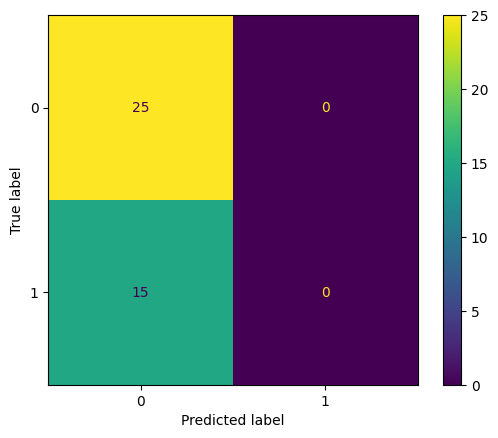

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

preds = model.predict(test_x)
preds = np.where(preds >= 0.5, 1, 0)

ConfusionMatrixDisplay.from_predictions(test_y, preds)